## Importando as bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Carregando os dados

In [3]:
print("=" * 60)
print("CARREGAMENTO DOS DADOS")
print("=" * 60)

# URL do dataset no UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Nomes das colunas
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Leitura dos dados
df = pd.read_csv(url, names=column_names)

print("\nPrimeiras linhas do dataset:")
print(df.head())

print("\nInformações do dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())

CARREGAMENTO DOS DADOS

Primeiras linhas do dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Estatísticas descritivas:
       sepal_length

## Convertendo as especies para valores numericos

In [4]:
print("\n" + "=" * 60)
print("CONVERSÃO DE DADOS")
print("=" * 60)

species_mapping = {
    'Iris-setosa': 1,
    'Iris-versicolor': 2,
    'Iris-virginica': 3
}

df['species'] = df['species'].replace(species_mapping)

print("\nDados após conversão:")
print(df.head(10))
print(f"\nValores únicos na coluna species: {df['species'].unique()}")


CONVERSÃO DE DADOS

Dados após conversão:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1
5           5.4          3.9           1.7          0.4        1
6           4.6          3.4           1.4          0.3        1
7           5.0          3.4           1.5          0.2        1
8           4.4          2.9           1.4          0.2        1
9           4.9          3.1           1.5          0.1        1

Valores únicos na coluna species: [1 2 3]


C:\Users\valen\AppData\Local\Temp\ipykernel_19480\1517311199.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace(species_mapping)


## Separando os dados

In [5]:
X = df.drop('species', axis=1)  # Features (características)
y = df['species']                # Target (espécie)

print(f"\nShape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")


Shape de X (features): (150, 4)
Shape de y (target): (150,)


## Dividindo em conjuntos de treino e teste

In [6]:
print("\n" + "=" * 60)
print("DIVISÃO DOS DADOS")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True  # IMPORTANTE: embaralhar os dados
)

print(f"Tamanho do conjunto de treino: {len(X_train)} amostras ({len(X_train)/len(df)*100:.1f}%)")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras ({len(X_test)/len(df)*100:.1f}%)")


DIVISÃO DOS DADOS
Tamanho do conjunto de treino: 120 amostras (80.0%)
Tamanho do conjunto de teste: 30 amostras (20.0%)


## Decision Tree

In [7]:
print("\n" + "=" * 60)
print("TREINAMENTO DO MODELO")
print("=" * 60)

# Opção 1: Decision Tree
model = DecisionTreeClassifier(random_state=42)
model_name = "Decision Tree"

# Opção 2: k-Nearest Neighbors
# model = KNeighborsClassifier(n_neighbors=5)
# model_name = "k-Nearest Neighbors"

# Opção 3: Multilayer Perceptron
# model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
# model_name = "Multilayer Perceptron"

# Opção 4: Naïve Bayes
# model = GaussianNB()
# model_name = "Naïve Bayes"

# Opção 5: Perceptron
# model = Perceptron(max_iter=1000, random_state=42)
# model_name = "Perceptron"

model.fit(X_train, y_train)

print("✓ Treinamento concluído!")


TREINAMENTO DO MODELO
✓ Treinamento concluído!


## Avaliando o modelo


AVALIAÇÃO DO MODELO

Acurácia do modelo: 100.00%

Relatório de Classificação:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de Confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


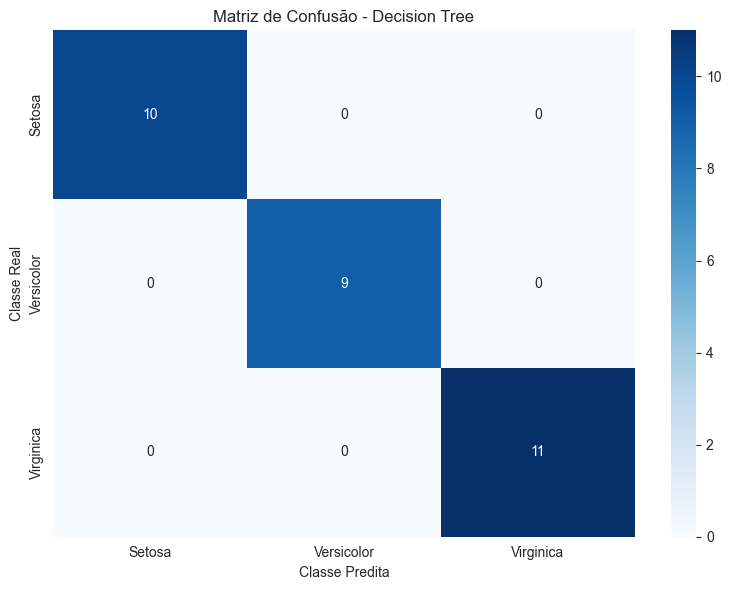

In [8]:
print("\n" + "=" * 60)
print("AVALIAÇÃO DO MODELO")
print("=" * 60)

# Fazer predições
y_pred = model.predict(X_test)

# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy * 100:.2f}%")

# Relatório de classificação detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred,
                          target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

# Matriz de confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title(f'Matriz de Confusão - {model_name}')
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

## Classificar novas amostras

In [9]:
print("\n" + "=" * 60)
print("CLASSIFICAÇÃO DE NOVAS AMOSTRAS")
print("=" * 60)

def classificar_amostra(sepal_length, sepal_width, petal_length, petal_width):

    nova_amostra = pd.DataFrame({
        'sepal_length': [sepal_length],
        'sepal_width': [sepal_width],
        'petal_length': [petal_length],
        'petal_width': [petal_width]
    })

    predicao = model.predict(nova_amostra)[0]

    especies = {1: 'setosa', 2: 'versicolor', 3: 'virginica'}

    return especies[predicao]

print("\nExemplos de classificação:\n")

# Iris-setosa (sépalas e pétalas pequenas)
exemplo1 = (5.1, 3.5, 1.4, 0.2)
resultado1 = classificar_amostra(*exemplo1)
print(f"Amostra 1: sepal_length={exemplo1[0]}, sepal_width={exemplo1[1]}, "
      f"petal_length={exemplo1[2]}, petal_width={exemplo1[3]}")
print(f"Classificação: {resultado1}\n")

# Iris-versicolor (valores médios)
exemplo2 = (6.0, 2.7, 5.1, 1.6)
resultado2 = classificar_amostra(*exemplo2)
print(f"Amostra 2: sepal_length={exemplo2[0]}, sepal_width={exemplo2[1]}, "
      f"petal_length={exemplo2[2]}, petal_width={exemplo2[3]}")
print(f"Classificação: {resultado2}\n")

# Iris-virginica (pétalas e sépalas grandes)
exemplo3 = (6.5, 3.0, 5.8, 2.2)
resultado3 = classificar_amostra(*exemplo3)
print(f"Amostra 3: sepal_length={exemplo3[0]}, sepal_width={exemplo3[1]}, "
      f"petal_length={exemplo3[2]}, petal_width={exemplo3[3]}")
print(f"Classificação: {resultado3}\n")


CLASSIFICAÇÃO DE NOVAS AMOSTRAS

Exemplos de classificação:

Amostra 1: sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2
Classificação: setosa

Amostra 2: sepal_length=6.0, sepal_width=2.7, petal_length=5.1, petal_width=1.6
Classificação: versicolor

Amostra 3: sepal_length=6.5, sepal_width=3.0, petal_length=5.8, petal_width=2.2
Classificação: virginica



## Interface

In [10]:
print("=" * 60)
print("INTERFACE")
print("=" * 60)

contador_classificacoes = 0

def menu_interativo():
    global contador_classificacoes

    while True:
        print("\n" + "=" * 60)
        print("Insira os dados da flor para classificação")
        print("(ou digite 'sair' para encerrar)")
        print("=" * 60)

        try:
            sepal_length = input("\nComprimento da sépala (cm): ")
            if sepal_length.lower() == 'sair':
                print("\nEncerrando classificador...")
                break

            sepal_width = input("Largura da sépala (cm): ")
            petal_length = input("Comprimento da pétala (cm): ")
            petal_width = input("Largura da pétala (cm): ")

            # Converter para float
            sepal_length = float(sepal_length)
            sepal_width = float(sepal_width)
            petal_length = float(petal_length)
            petal_width = float(petal_width)

            # Classificar
            especie = classificar_amostra(sepal_length, sepal_width,
                                         petal_length, petal_width)

            # Incrementar contador
            contador_classificacoes += 1

            print("\n" + "=" * 60)
            print(f"✓ RESULTADO {contador_classificacoes}: A flor é da espécie Iris {especie}")
            print("=" * 60)

        except ValueError:
            print("\n✗ ERRO: Por favor, insira valores numéricos válidos!")
        except Exception as e:
            print(f"\n✗ ERRO: {e}")

menu_interativo()

INTERFACE

Insira os dados da flor para classificação
(ou digite 'sair' para encerrar)


KeyboardInterrupt: Interrupted by user